In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df['location'] = df['location'].fillna('Sarjapur  Road')
df['size'] = df['size'].fillna('2 BHK')
df['bath'] = df['bath'].fillna(df['bath'].median())

df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony          609
price              0
bhk                0
dtype: int64

In [10]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
numeric_values = pd.to_numeric(df['total_sqft'], errors='coerce')

non_numeric_values = df['total_sqft'][numeric_values.isna()].tolist()



In [12]:
def convertRange(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convertRange)
df.dropna(inplace=True)
df['Price_per_square_feet'] = df['price']*100000 / df['total_sqft']


In [13]:
location_count = df['location'].value_counts()

location_count

location
Whitefield            396
Sarjapur  Road        311
Electronic City       236
Kanakpura Road        216
Thanisandra           211
                     ... 
BCC Layout              1
Jaladarsini Layout      1
Jai Bheema Nagar        1
Bhuvaneswari Nagar      1
Abshot Layout           1
Name: count, Length: 633, dtype: int64

In [14]:
location_count_less_10 = location_count[location_count<10]

df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)


df = df[((df['total_sqft']/df['bhk'])>=300)]

In [15]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.total_sqft / subdf.bhk)
        st = np.std(subdf.total_sqft / subdf.bhk)

        gen_df = subdf[((subdf.total_sqft / subdf.bhk) > (m - st)) & ((subdf.total_sqft / subdf.bhk) <= (m + st))]
        df_output = pd.concat([df_output, gen_df], ignore_index=True)
    return df_output

df = remove_outliers_sqft(df)

In [16]:
df.drop(columns=['society' , 'availability' ,'area_type' , 'balcony'] , inplace=True)
df.drop(columns='size' , inplace=True)

In [17]:
df.head()

,location,total_sqft,bath,price,bhk,Price_per_square_feet
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525
3,1st Phase JP Nagar,2059.0,3.0,225.0,3,10927.634774
4,1st Phase JP Nagar,1394.0,2.0,100.0,2,7173.601148


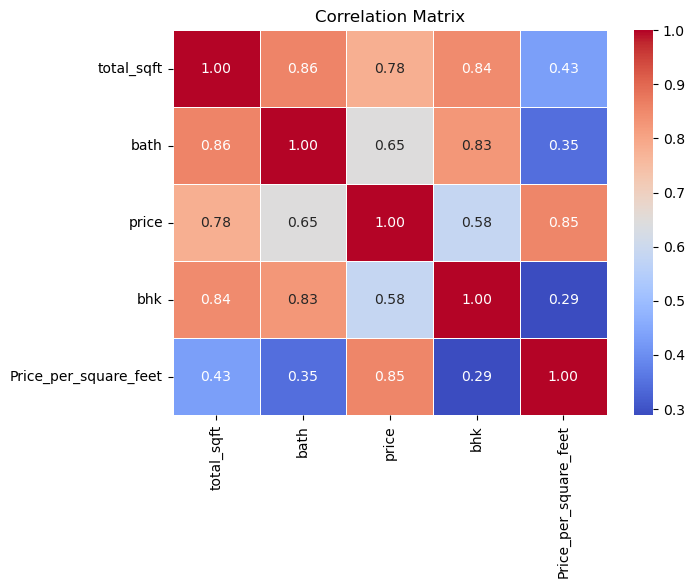

In [18]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

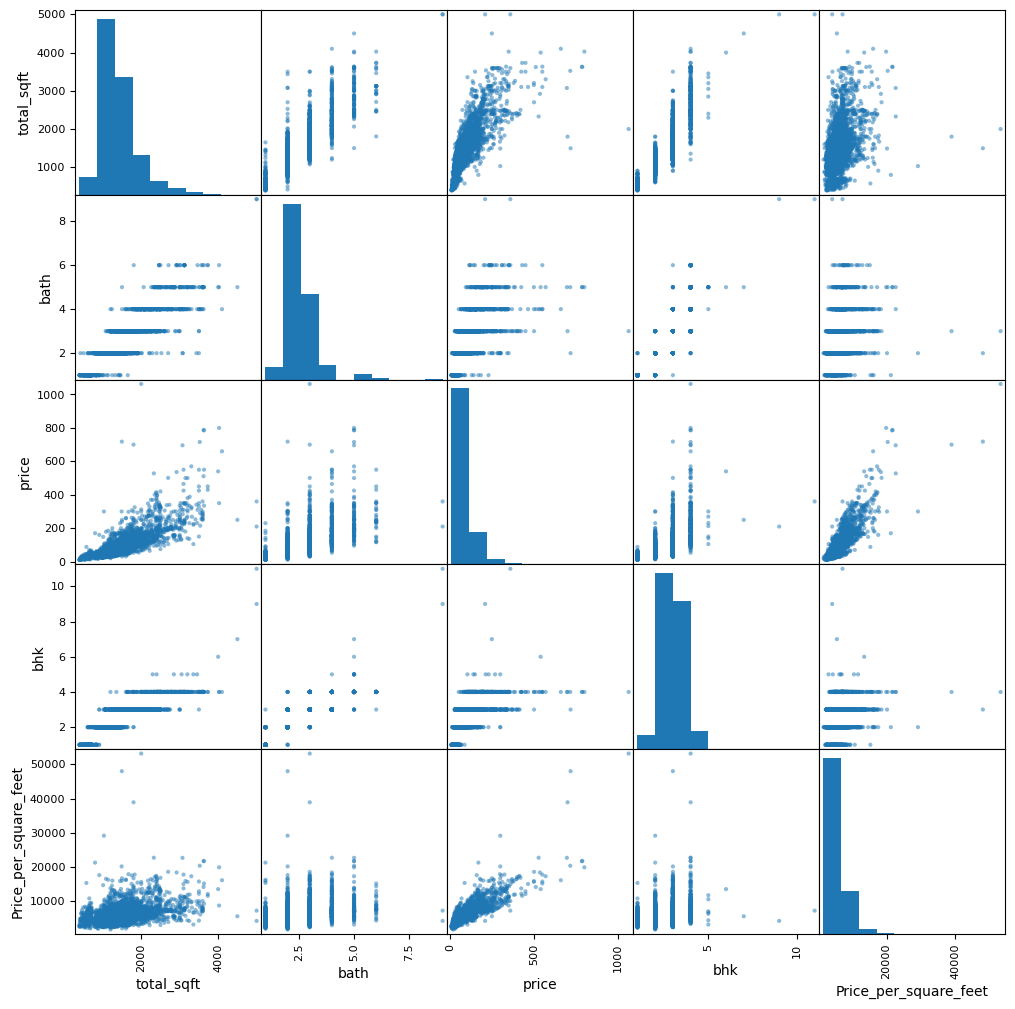

In [19]:
pd.plotting.scatter_matrix(numeric_df, figsize=(12, 12))
plt.show()

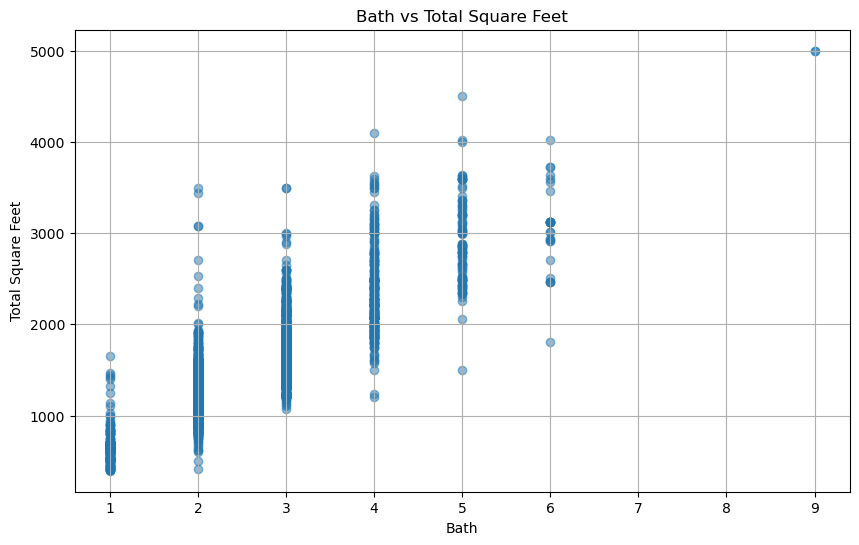

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bath'], df['total_sqft'], alpha=0.5)
plt.title('Bath vs Total Square Feet')
plt.xlabel('Bath')
plt.ylabel('Total Square Feet')
plt.grid(True);

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
X = df.drop(columns=['price'])
y = df['price']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

scaler = StandardScaler()

In [25]:
lr = LinearRegression()
lr_pipe = make_pipeline(column_trans,scaler,lr)

In [26]:
lr_pipe.fit(X_train,y_train)

/Users/anupam/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [27]:
#Function for calculating metrics Precision, Recall, F1 score

def evaluate_regression(y_true, y_pred, threshold_percentage=0.1):
    # Define positive predictions based on threshold percentage
    threshold = threshold_percentage * np.mean(y_true)
    y_pred_pos = np.abs(y_true - y_pred) <= threshold

    # Calculate true positives, false positives, and false negatives
    true_positives = np.sum(y_true[y_pred_pos])
    false_positives = np.sum(y_pred_pos) - true_positives
    false_negatives = np.sum(y_true) - true_positives

    # Calculate Precision, Recall, and F1 score
    precision_lr = true_positives / (true_positives + false_positives)
    recall_lr = true_positives / (true_positives + false_negatives)
    f1_score_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)

    return precision_lr, recall_lr, f1_score_lr

In [28]:
#Making Predictions
y_pred = lr_pipe.predict(X_test)
models = 'Linear Regression'
predictions = y_pred  

#Evaluating Linear Regression
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_pipeline_score = lr_pipe.score(X_test, y_test)*100
precision_lr, recall_lr, f1_score_lr = evaluate_regression(y_test, y_pred)

print("LINEAR REGRESSION:")
print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)
print("Accuracy:",lr_pipeline_score)
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_score_lr:.4f}")

LINEAR REGRESSION:
Mean Squared Error: 246.87375155449945
Mean Absolute Error: 7.664742824228068
Accuracy: 94.16887424361214
Precision: 81.5192
Recall: 0.6871
F1 Score: 1.3626


In [29]:
ridge_reg = Ridge(random_state=0)
lasso_reg = Lasso(random_state=0)

In [30]:
ridge_pipe = make_pipeline(column_trans, scaler, ridge_reg)
lasso_pipe = make_pipeline(column_trans, scaler, lasso_reg)

In [31]:
ridge_pipe.fit(X_train, y_train)

/Users/anupam/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=0))])

In [32]:
#Function for calculating metrics Precision, Recall, F1 score

def evaluate_regression(y_true, y_pred, threshold_percentage=0.1):
    # Define positive predictions based on threshold percentage
    threshold = threshold_percentage * np.mean(y_true)
    y_pred_pos = np.abs(y_true - y_pred) <= threshold

    # Calculate true positives, false positives, and false negatives
    true_positives = np.sum(y_true[y_pred_pos])
    false_positives = np.sum(y_pred_pos) - true_positives
    false_negatives = np.sum(y_true) - true_positives

    # Calculate Precision, Recall, and F1 score
    precision_ridge = true_positives / (true_positives + false_positives)
    recall_ridge = true_positives / (true_positives + false_negatives)
    f1_score_ridge = 2 * (precision_ridge * recall_ridge) / (precision_ridge + recall_ridge)

    return precision_ridge, recall_ridge, f1_score_ridge

In [33]:
# Making predictions
ridge_y_pred = ridge_pipe.predict(X_test)
models = 'Ridge Regression'
predictions = ridge_y_pred  


#Evaluating Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_pipeline_score = ridge_pipe.score(X_test,y_test)*100
precision_ridge, recall_ridge, f1_score_ridge = evaluate_regression(y_test, ridge_y_pred)

print("RIDGE REGRESSION:")
print("Mean Squared Error:", ridge_mse)
print("Mean Absolute Error:", ridge_mae)
print("Accuracy:",ridge_pipeline_score)
print(f"Precision: {precision_ridge:.4f}")
print(f"Recall: {recall_ridge:.4f}")
print(f"F1 Score: {f1_score_ridge:.4f}")

RIDGE REGRESSION:
Mean Squared Error: 247.39691065054612
Mean Absolute Error: 7.6674748441135
Accuracy: 94.15651729411695
Precision: 81.5080
Recall: 0.6853
F1 Score: 1.3592


In [34]:
lasso_pipe.fit(X_train, y_train)

/Users/anupam/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=0))])

In [35]:
#Function for calculating metrics Precision, Recall, F1 score for LASSO

def evaluate_regression(y_true, y_pred, threshold_percentage=0.1):
    # Define positive predictions based on threshold percentage
    threshold = threshold_percentage * np.mean(y_true)
    y_pred_pos = np.abs(y_true - y_pred) <= threshold

    # Calculate true positives, false positives, and false negatives
    true_positives = np.sum(y_true[y_pred_pos])
    false_positives = np.sum(y_pred_pos) - true_positives
    false_negatives = np.sum(y_true) - true_positives

    # Calculate Precision, Recall, and F1 score
    precision_lasso = true_positives / (true_positives + false_positives)
    recall_lasso = true_positives / (true_positives + false_negatives)
    f1_score_lasso = 2 * (precision_lasso * recall_lasso) / (precision_lasso + recall_lasso)

    return precision_lasso, recall_lasso, f1_score_lasso

In [36]:
# Making Predictions
lasso_y_pred = lasso_pipe.predict(X_test)
models = 'Lasso Regression'
predictions = lasso_y_pred  

# Evaluating Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_pipeline_score = lasso_pipe.score(X_test,y_test)*100
precision_lasso, recall_lasso, f1_score_lasso = evaluate_regression(y_test, lasso_y_pred)

print("LASSO REGRESSION:")
print("Mean Squared Error:", lasso_mse)
print("Mean Absolute Error:", lasso_mae)
print("Accuracy:",lasso_pipeline_score)
print(f"Precision: {precision_lasso:.4f}")
print(f"Recall: {recall_lasso:.4f}")
print(f"F1 Score: {f1_score_lasso:.4f}")

LASSO REGRESSION:
Mean Squared Error: 297.26320378727445
Mean Absolute Error: 8.146380508263443
Accuracy: 92.97868196551593
Precision: 81.9978
Recall: 0.7206
F1 Score: 1.4286


In [37]:
# SVM model object
svm_reg = SVR(kernel='linear')

# Creating the pipeline for SVM
svm_pipe = make_pipeline(column_trans, scaler, svm_reg)

In [38]:
svm_pipe.fit(X_train, y_train)

/Users/anupam/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])

In [39]:
#Function for calculating metrics Precision, Recall, F1 score for SVM

def evaluate_regression(y_true, y_pred, threshold_percentage=0.1):
    # Define positive predictions based on threshold percentage
    threshold = threshold_percentage * np.mean(y_true)
    y_pred_pos = np.abs(y_true - y_pred) <= threshold

    # Calculate true positives, false positives, and false negatives
    true_positives = np.sum(y_true[y_pred_pos])
    false_positives = np.sum(y_pred_pos) - true_positives
    false_negatives = np.sum(y_true) - true_positives

    # Calculate Precision, Recall, and F1 score
    precision_svm = true_positives / (true_positives + false_positives)
    recall_svm = true_positives / (true_positives + false_negatives)
    f1_score_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)

    return precision_svm, recall_svm, f1_score_svm

In [40]:
# Making predictions
svm_y_pred = svm_pipe.predict(X_test)
models = 'SVM Regression'
predictions = svm_y_pred 

# Evaluating SVM Regression
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_pipeline_score = svm_pipe.score(X_test,y_test)*100
precision_svm, recall_svm, f1_score_svm = evaluate_regression(y_test, svm_y_pred)

print("SVM Regression:")
print("Mean Squared Error:", svm_mse)
print("Mean Absolute Error:", svm_mae)
print("Accuracy:",svm_pipeline_score)
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_score_svm:.4f}")

SVM Regression:
Mean Squared Error: 353.2872995048598
Mean Absolute Error: 5.8889955166408745
Accuracy: 91.65540014450373
Precision: 75.5061
Recall: 0.7532
F1 Score: 1.4916


In [41]:
import xgboost as xgb

In [42]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [43]:
xgb_pipe = make_pipeline(column_trans, StandardScaler(), xg_reg)

In [44]:
xgb_pipe.fit(X_train, y_train)

/Users/anupam/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(alpha=10, base_score=None, booster=None,
                              callbacks=None, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=0.3,
                              device=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [45]:
#Function for calculating metrics Precision, Recall, F1 score for XGBoost

def evaluate_regression(y_true, y_pred, threshold_percentage=0.1):
    # Define positive predictions based on threshold percentage
    threshold = threshold_percentage * np.mean(y_true)
    y_pred_pos = np.abs(y_true - y_pred) <= threshold

    # Calculate true positives, false positives, and false negatives
    true_positives = np.sum(y_true[y_pred_pos])
    false_positives = np.sum(y_pred_pos) - true_positives
    false_negatives = np.sum(y_true) - true_positives

    # Calculate Precision, Recall, and F1 score
    precision_xgb = true_positives / (true_positives + false_positives)
    recall_xgb = true_positives / (true_positives + false_negatives)
    f1_score_xgb = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)

    return precision_xgb, recall_xgb, f1_score_xgb

In [46]:
y_pred = xgb_pipe.predict(X_test)
models = 'XGB Regression'
predictions = y_pred 

# Evaluating XGB Regression
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_accuracy = xgb_pipe.score(X_test, y_test)*100
precision_xgb, recall_xgb, f1_score_xgb = evaluate_regression(y_test, y_pred)

print("XGBoost Regression:")
print("Mean Squared Error:", xgb_mse)
print("Mean Absolute Error:", xgb_mae)
print("Acuuracy:", xgb_accuracy)
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_score_xgb:.4f}")

XGBoost Regression:
Mean Squared Error: 86.36562454905412
Mean Absolute Error: 3.237047559454435
Acuuracy: 97.9600552322658
Precision: 76.4335
Recall: 0.8243
F1 Score: 1.6311


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score, precision_score

In [48]:
rf_reg = RandomForestRegressor(random_state=0)

In [49]:
rf_pipe = make_pipeline(column_trans, scaler, rf_reg)

In [50]:
rf_pipe.fit(X_train, y_train)

/Users/anupam/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [51]:
#Function for calculating metrics Precision, Recall, F1 score for RF

def evaluate_regression(y_true, y_pred, threshold_percentage=0.1):
    # Define positive predictions based on threshold percentage
    threshold = threshold_percentage * np.mean(y_true)
    y_pred_pos = np.abs(y_true - y_pred) <= threshold

    # Calculate true positives, false positives, and false negatives
    true_positives = np.sum(y_true[y_pred_pos])
    false_positives = np.sum(y_pred_pos) - true_positives
    false_negatives = np.sum(y_true) - true_positives

    # Calculate Precision, Recall, and F1 score
    precision_rf = true_positives / (true_positives + false_positives)
    recall_rf = true_positives / (true_positives + false_negatives)
    f1_score_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

    return precision_rf, recall_rf, f1_score_rf

In [52]:
#Making Predictions
rf_y_pred = rf_pipe.predict(X_test)
models = 'Random Forest Regression'
predictions = rf_y_pred 

# Evaluating Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_accuracy = rf_pipe.score(X_test, y_test)*100
precision_rf, recall_rf, f1_score_rf = evaluate_regression(y_test, rf_y_pred)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("Accuracy:", rf_accuracy)
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_score_rf:.4f}")

Random Forest Regression:
Mean Squared Error: 43.23833277244626
Mean Absolute Error: 0.9574604471195183
Accuracy: 98.9787162292261
Precision: 81.9987
Recall: 0.9408
F1 Score: 1.8603


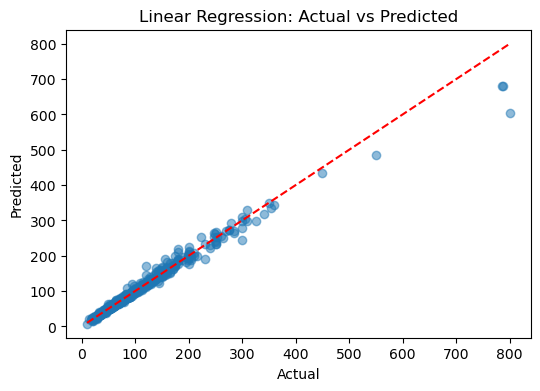

In [53]:
# Plot predicted vs actual values for Linear Regression
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

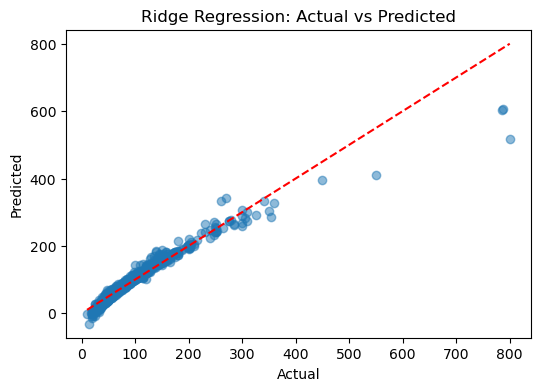

In [54]:
# Plot predicted vs actual values for Ridge Regression
plt.figure(figsize=(6,4))
plt.scatter(y_test, ridge_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()

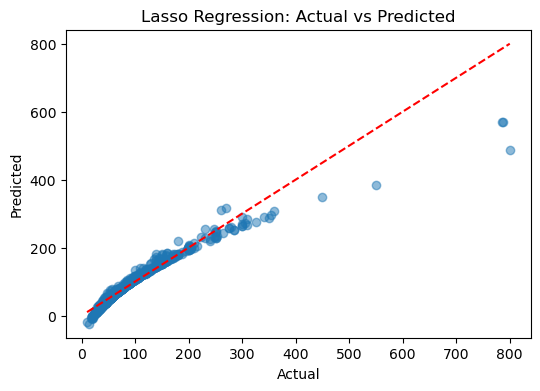

In [55]:
# Plot predicted vs actual values for Lasso Regression
plt.figure(figsize=(6,4))
plt.scatter(y_test, lasso_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()

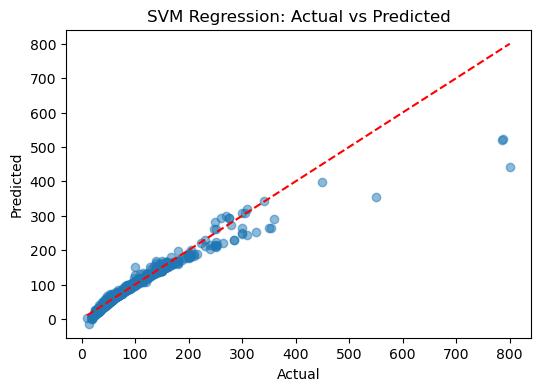

In [56]:
# Plot predicted vs actual values for SVM Regression
plt.figure(figsize=(6,4))
plt.scatter(y_test, svm_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Regression: Actual vs Predicted')
plt.show()

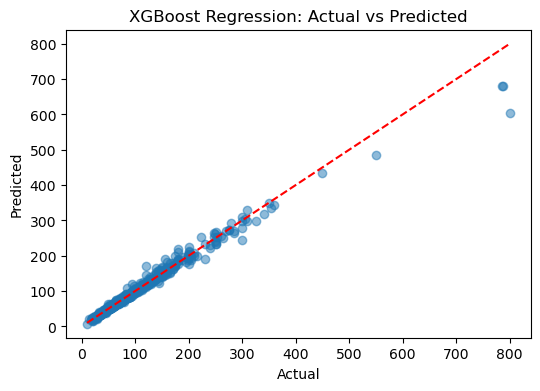

In [57]:
# Plot predicted vs actual values for XGBoost Regression
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Regression: Actual vs Predicted')
plt.show()


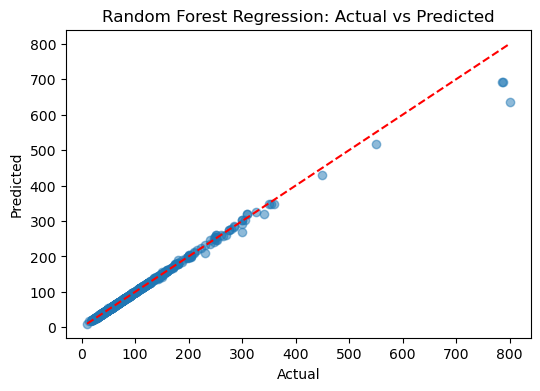

In [58]:
# Plot predicted vs actual values
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

/var/folders/80/70njwncs4cn8v65t5t0cj23w0000gp/T/ipykernel_18070/2560527996.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


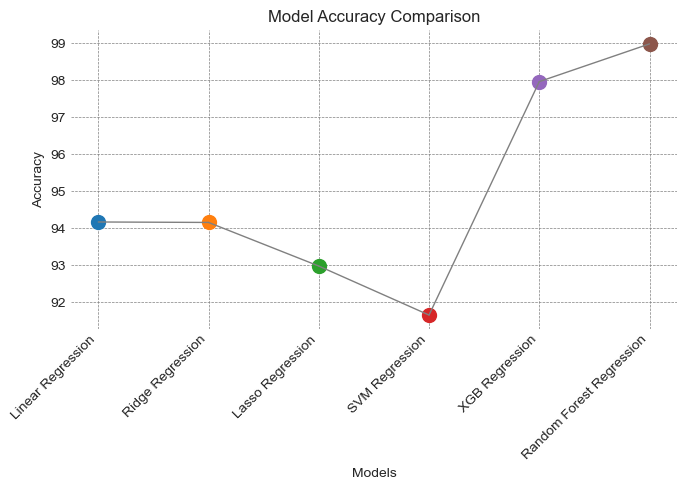

In [59]:
import matplotlib.pyplot as plt


models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVM Regression', 'XGB Regression', 'Random Forest Regression']
accuracy = [lr_pipeline_score, ridge_pipeline_score, lasso_pipeline_score, svm_pipeline_score, xgb_accuracy, rf_accuracy]
precision = [precision_lr, precision_ridge, precision_lasso, precision_svm, precision_xgb, precision_rf]
recall = [recall_lr, recall_ridge, recall_lasso, recall_svm, recall_xgb, recall_rf]
f1 = [f1_score_lr, f1_score_ridge, f1_score_lasso, f1_score_svm, f1_score_xgb, f1_score_rf]


plt.style.use('seaborn-darkgrid')

# Graph 1: Comparing Accuracy of Models
plt.figure(figsize=(7,5))
for i, (model, acc) in enumerate(zip(models, accuracy)):
    plt.scatter(model, acc, color=plt.cm.tab10(i), s=100) 
for i in range(len(models) - 1):  
    plt.plot(models[i:i+2], accuracy[i:i+2], color='gray', linestyle='-', linewidth=1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.gca().patch.set_facecolor('white')  
plt.show()



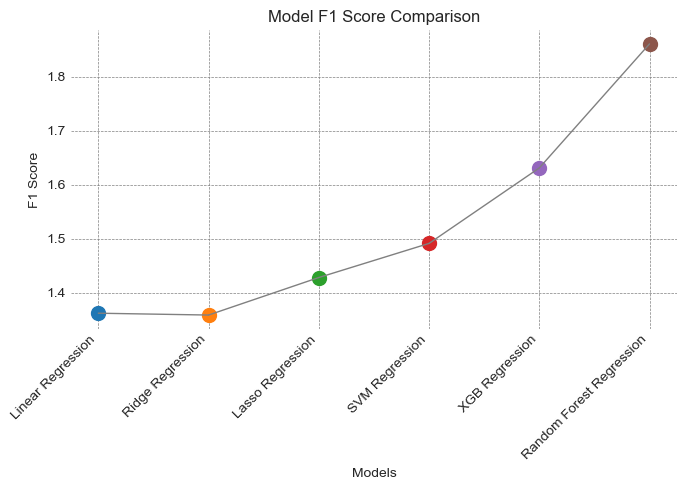

In [60]:
# Graph 2: Comparing F1 Score of Models
plt.figure(figsize=(7, 5))
for i, (model, f1_score) in enumerate(zip(models, f1)):
    plt.scatter(model, f1_score, color=plt.cm.tab10(i), s=100)  
for i in range(len(models) - 1):  
    plt.plot(models[i:i+2], f1[i:i+2], color='gray', linestyle='-', linewidth=1)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.gca().patch.set_facecolor('white')  
plt.show()

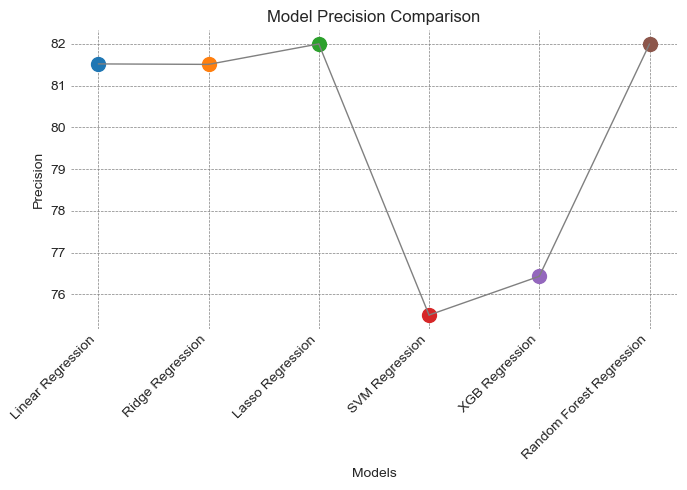

In [61]:
# Graph 3: Comparing Precision of Models
plt.figure(figsize=(7, 5))
for i, (model, prec) in enumerate(zip(models, precision)):
    plt.scatter(model, prec, color=plt.cm.tab10(i), s=100)  
for i in range(len(models) - 1):  
    plt.plot(models[i:i+2], precision[i:i+2], color='gray', linestyle='-', linewidth=1)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.gca().patch.set_facecolor('white') 
plt.show()


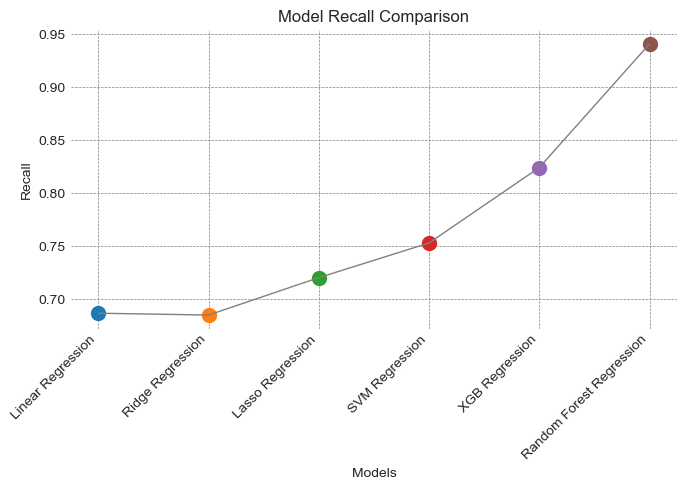

In [62]:
# Graph 4: Comparing Recall of Models
plt.figure(figsize=(7, 5))
for i, (model, rec) in enumerate(zip(models, recall)):
    plt.scatter(model, rec, color=plt.cm.tab10(i), s=100)  
for i in range(len(models) - 1):  
    plt.plot(models[i:i+2], recall[i:i+2], color='gray', linestyle='-', linewidth=1)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.gca().patch.set_facecolor('white') 
plt.show()
